In [107]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib as plt

In [108]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mrcnn.model import mold_image
from mrcnn.model import MaskRCNN
from numpy import expand_dims
from doggosutils import PredictionConfig, DoggosDataset
from PIL import Image as im 

In [109]:
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model_path = r'C:\Users\a.szlendak\Desktop\pg\dogos-emotions-recognition-vol2\mask_rcnn_kangaroo_cfg_0005.h5'
model.load_weights(model_path, by_name=True)
model2 = load_model('modelcool100.h5')

In [110]:
img_path = r'data\smiley\smiley (3).jpg'
image_all = plt.imread(img_path)    
cfg = PredictionConfig()
scaled_image = mold_image(image_all, cfg)
sample = expand_dims(scaled_image, 0)
yhat = model.detect(sample, verbose=0)[0]
yhat['rois']=[e for e in yhat['rois']][0]
y1, x1, y2, x2 =yhat['rois']
width, height = x2 - x1, y2 - y1
rect = Rectangle((x1, y1), width, height, fill=False, color='red')
ax.add_patch(rect)
plt.imsave(r'C:\Users\a.szlendak\Desktop\pg\dogos-emotions-recognition-vol2\testphoto.jpg', image_all[int(y1):int(y2), int(x1):int(x2), :])

In [112]:
img_path = r'C:\Users\a.szlendak\Desktop\pg\dogos-emotions-recognition-vol2\testphoto.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
preds = model2.predict(img_tensor)
x = np.argmax(preds)
#print(preds)
#print(categ[x])

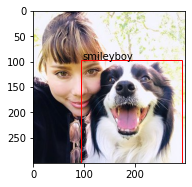

In [113]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(image_all)
rect = Rectangle((x1, y1), width, height, fill=False, color='red')
ax.add_patch(rect)
categ = ["angryboy", "goodboy", 'sleepyboy', 'smileyboy']
plt.text(y1, y1,categ[x])
plt.show()